### LIMPIEZA DEL DATASET PRIORIZANDO LA ELIMINACIÓN DE FILAS EN AQUELLAS QUE SEAN MUY SIMILARES Y LA ELIMINACIÓN DE COLUMNAS DADO EL CONOCIMIENTO DE LOS TIPOS DE DATOS ALMACENADOS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
huracanes = pd.read_csv("/content/drive/MyDrive/huracanes.csv")

In [ ]:
# Sustuimos los valores "NaN" por valores ceros "0" de la columna "category"
# Para realizar una matriz de correlacion mas completa

huracanes2 = huracanes.copy()

huracanes2['category'] = huracanes2['category'].replace('NaN', 0)
huracanes2['category'] = huracanes2['category'].fillna(0)
huracanes2['category'] = huracanes2['category'].astype(int)
huracanes2

,no,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,0,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,0,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,0,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,0,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,0,25,1012,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19061,19062,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0
19062,19063,Wanda,2021,11,7,6,38.1,-36.4,tropical storm,0,35,1004,60.0,0.0
19063,19064,Wanda,2021,11,7,12,39.2,-34.9,other low,0,35,1006,90.0,0.0
19064,19065,Wanda,2021,11,7,18,40.9,-32.8,other low,0,40,1006,90.0,0.0


In [ ]:
huracanes.describe()

,no,year,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
count,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,4684.000000,19066.000000,19066.000000,9554.000000,9554.000000
mean,9533.500000,2002.278926,8.698626,15.781968,9.094042,26.994252,-61.524300,1.898377,50.017413,993.554390,146.309399,14.811074
std,5504.024452,12.556517,1.352956,8.878563,6.733683,10.414302,21.062519,1.150590,25.501030,18.737342,156.006026,34.083358
min,1.000000,1975.000000,1.000000,1.000000,0.000000,7.000000,-109.300000,1.000000,10.000000,882.000000,0.000000,0.000000
25%,4767.250000,1993.000000,8.000000,8.000000,5.000000,18.400000,-78.700000,1.000000,30.000000,987.000000,0.000000,0.000000
50%,9533.500000,2004.000000,9.000000,16.000000,12.000000,26.600000,-62.250000,1.000000,45.000000,1000.000000,110.000000,0.000000
75%,14299.750000,2012.000000,9.000000,24.000000,18.000000,33.700000,-45.600000,3.000000,65.000000,1007.000000,220.000000,0.000000
max,19066.000000,2021.000000,12.000000,31.000000,23.000000,70.700000,13.500000,5.000000,165.000000,1024.000000,1440.000000,300.000000


<ipython-input-9-9b5f5e1f73e0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = huracanes2[columnas].corr()


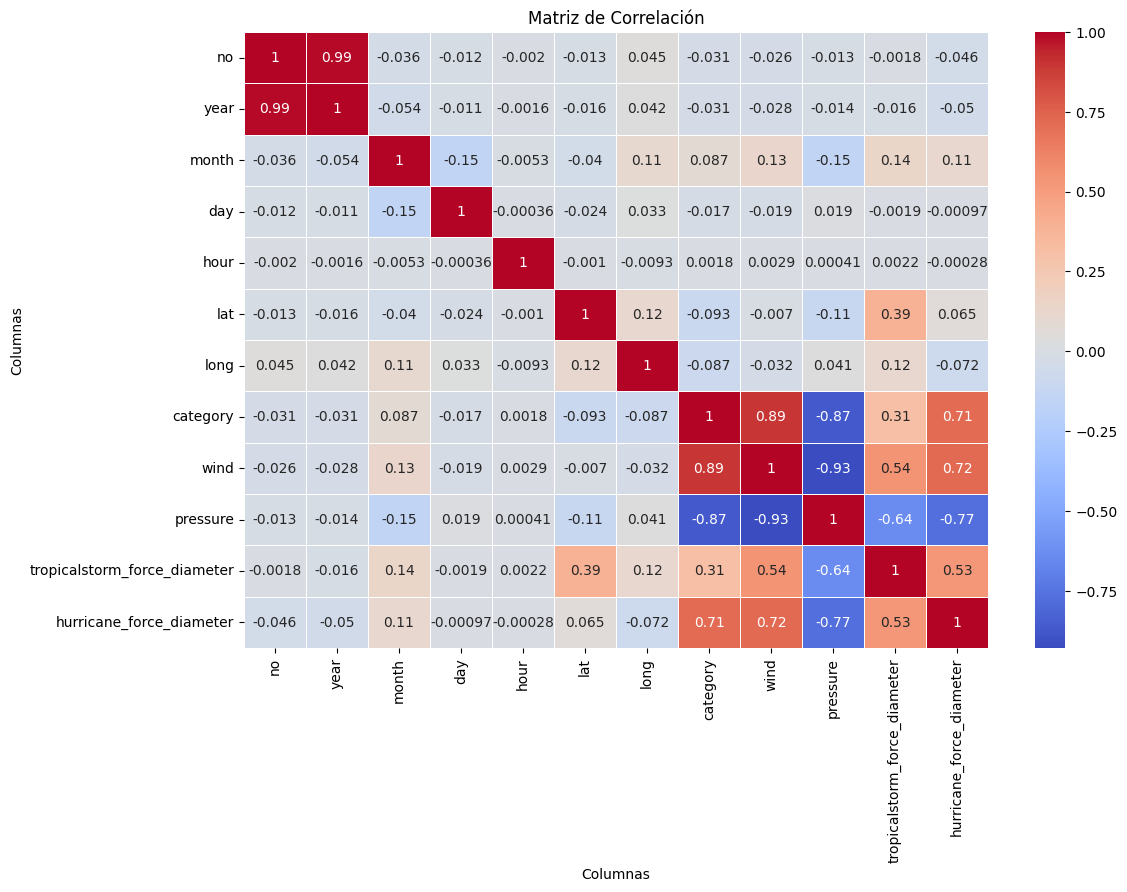

In [ ]:
columnas = [ 'no', 'year', 'month', 'day', 'hour', 'lat', 'long', 'status', 'category',
    'wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter']

matriz_correlacion = huracanes2[columnas].corr()

plt.figure(figsize=(12, 8))
# mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

plt.xlabel("Columnas")
plt.ylabel("Columnas")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
filas_nulas = huracanes2[huracanes.isnull().all(axis=1)]
cantidad_filas_nulas = len(filas_nulas)
print(f"Filas nulas: {cantidad_filas_nulas}")

Filas nulas: 0


In [ ]:
valores_nulos_por_columna = huracanes2.isnull().sum()
print(valores_nulos_por_columna)

no                                 0
name                               0
year                               0
month                              0
day                                0
hour                               0
lat                                0
long                               0
status                             0
category                           0
wind                               0
pressure                           0
tropicalstorm_force_diameter    9512
hurricane_force_diameter        9512
dtype: int64


#### tropicalstorm_force_diameter:
#### Diámetro (en millas náuticas) del área que experimenta vientos con fuerza de tormenta tropical (34 nudos o más). Sólo disponible a partir de 2004.

#### Hurricane_force_diameter:
#### Diámetro (en millas náuticas) del área que experimenta vientos huracanados (64 nudos o más). Sólo disponible a partir de 2004.

DADO QUE LOS DATOS DE ESTAS DOS COLUMNAS SOLO FUERON ALMACENADOS EN LOS ULTIMOS 17 AÑOS, CONTRA LOS 28 AÑOS ANTERIORES, SE HA OPTADO POR LA ELIMINACIÓN DE ESTAS COLUMNAS

In [ ]:
# Eliminamos las columnas que tengan una correlación baja (menor a .8)
# Dejamos algunas otras con correlación baja, ya que suponemos podrían servir para analizar su comportamiento

columnas_a_eliminar = ['no', 'day', 'hour', 'lat', 'long', 'tropicalstorm_force_diameter', 'hurricane_force_diameter']
huracanes2 = huracanes2.drop(columns=columnas_a_eliminar)
huracanes2.head()

,name,year,month,status,category,wind,pressure
0,Amy,1975,6,tropical depression,0,25,1013
1,Amy,1975,6,tropical depression,0,25,1013
2,Amy,1975,6,tropical depression,0,25,1013
3,Amy,1975,6,tropical depression,0,25,1013
4,Amy,1975,6,tropical depression,0,25,1012


<ipython-input-13-df97fe8fb707>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = huracanes2[columnas].corr()


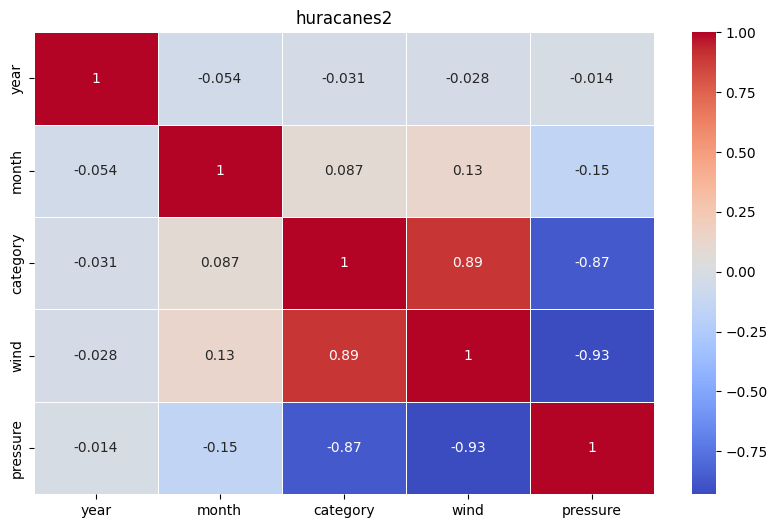

In [ ]:
columnas = ['year', 'month', 'status', 'category', 'wind', 'pressure']
matriz_correlacion = huracanes2[columnas].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("huracanes2")
plt.show()

## Notamos un dataset con corelación mas fuerte y que las columnas "category", "wind" y "pressure" son las que tienen mayor correlación. Por lo que procedemos a analizar las columnas

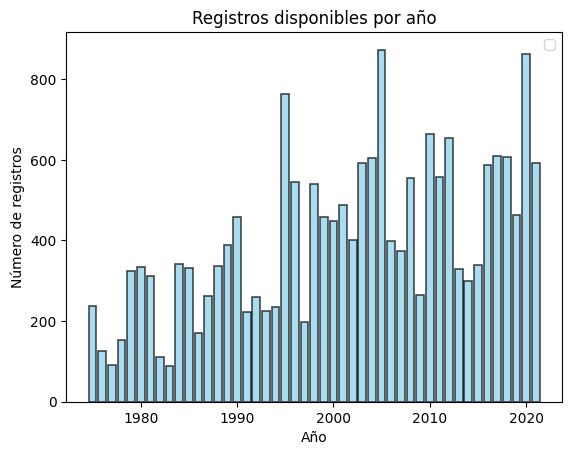

In [ ]:
huracanes2['year'] = huracanes2['year'].astype(int)
year_counts = huracanes2['year'].value_counts().sort_index()

fig, ax = plt.subplots()
bars = ax.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black', linewidth=1.2, alpha=0.7)

ax.set_title('Registros disponibles por año')
ax.set_xlabel('Año')
ax.set_ylabel('Número de registros')

plt.legend()
plt.show()

In [ ]:
conteo_siglo = huracanes2['year'].apply(lambda x: 'sigloxx' if x < 2000 else 'sigloxxi').value_counts()

print(conteo_siglo)

sigloxxi    11565
sigloxx      7501
Name: year, dtype: int64


### Notamos que hay demasiadas categorias (46 años). Pero si los clasificamos de forma binaria, los del siglo XX contra los del siglo XXI, hay una disparidad de mas de 4 mil datos

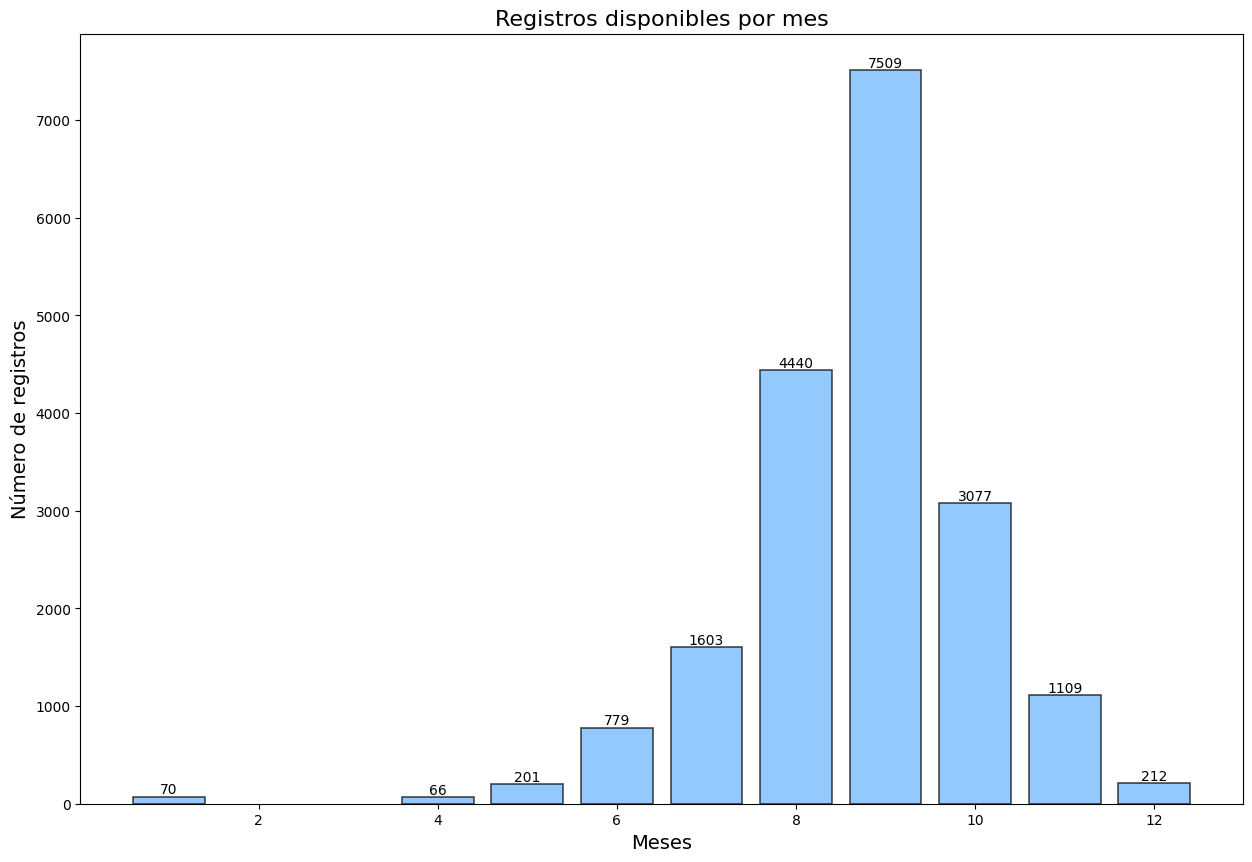

In [ ]:
huracanes['month'] = huracanes['month'].astype(int)
month_counts = huracanes['month'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(month_counts.index, month_counts.values, color='#66b3ff', edgecolor='black', linewidth=1.2, alpha=0.7)

ax.set_title('Registros disponibles por mes', fontsize=16)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Número de registros', fontsize=14)


# Agrega anotaciones en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

# Muestra el gráfico sin leyenda, ya que no hay elementos con etiquetas
plt.show()

### Con los meses podemos notar un patron de que es mucho más frecuente un fenomeno entre los meses de agosto a octubre.
### Pero también notamos que son 12 categorias y seria dificil manejarlas

##AHORA PROCEDEMOS A ELIMINAR ESTAS DOS COLUMNAS DADAS LAS RAZONES ANTERIORES Y QUE YA SABEMOS QUE NO TIENEN UNA CORRELACIÓN FUERTE
##SOLO MANTENDREMOS LA COLUMNA "name" PARA IDENTIFICAR CADA FENÓMENO Y EL COMPORTAMIENTO DEL DATASET

In [ ]:
huracanes2.drop(['year', 'month'], axis=1, inplace=True)
huracanes2

,name,status,category,wind,pressure
0,Amy,tropical depression,0,25,1013
1,Amy,tropical depression,0,25,1013
2,Amy,tropical depression,0,25,1013
3,Amy,tropical depression,0,25,1013
4,Amy,tropical depression,0,25,1012
...,...,...,...,...,...
19061,Wanda,tropical storm,0,35,1003
19062,Wanda,tropical storm,0,35,1004
19063,Wanda,other low,0,35,1006
19064,Wanda,other low,0,40,1006


In [ ]:
conteo_nombre = huracanes2['name'].value_counts()
conteo_nombre

Bonnie       273
Bertha       261
Dennis       244
Florence     239
Claudette    237
            ... 
AL022003       4
AL021999       4
AL012000       4
AL092003       4
AL092001       4
Name: name, Length: 258, dtype: int64


### Ahora analicemos: tenemos 19,066 registros, pero hemos notado que todos los diferentes fenomenos tienen mas de un registro, algunos con mas de 200, por lo que procedemos a eliminar aquellos más parecidos, usando las columnas con correlación más fuerte

In [ ]:
huracanes3 = huracanes2.groupby('name').apply(lambda x: x.drop_duplicates(subset=['status', 'category', 'wind']))
huracanes3 = huracanes3.droplevel(0).reset_index(drop=True)

huracanes3

,name,status,category,wind,pressure
0,AL011993,tropical depression,0,25,1003
1,AL011993,tropical depression,0,30,999
2,AL011993,extratropical,0,35,999
3,AL012000,tropical depression,0,25,1008
4,AL021992,tropical depression,0,25,1009
...,...,...,...,...,...
4237,Zeta,hurricane,1,80,978
4238,Zeta,hurricane,2,95,973
4239,Zeta,hurricane,3,100,970
4240,Zeta,hurricane,2,85,973


###Hemos eliminado las filas que en las tres columnas "category", "status" y "wind" fueran identicas por cada fenomeno, sorpresivamente se han eliminado cerca de 15,000 filas que repetian de manera identica los datos en estas filas.

###Hemos limpiado el dataset de aquellos datos que no nos servian, dado que eran iguales y solo dejamos 1.

In [ ]:
conteo_nombre = huracanes3['name'].value_counts()
conteo_nombre

Claudette    40
Edouard      39
Gustav       37
Florence     37
Charley      37
             ..
AL022003      1
AL101991      1
AL092003      1
AL051994      1
AL101993      1
Name: name, Length: 258, dtype: int64

Ahora el fenomeno con mas registros es de 40 y no 273 como antes

#Ahora nos comenzamos a concentar en la columna "category" para realizar un knn

In [ ]:
conteo_categoria = huracanes3['category'].value_counts()
conteo_categoria

0    2868
1     565
2     298
3     241
4     215
5      55
Name: category, dtype: int64

Dado que hay 6 categorias, procedemos a hacer una clasificación binaria, donde separemos a todos los que no fueron huracan de los que si fueron huracan

In [ ]:
conteo_tipo = huracanes3['category'].apply(lambda x: 'no huracan' if x == 0 else 'fue huracan').value_counts()
conteo_tipo


no huracan     2868
fue huracan    1374
Name: category, dtype: int64

###Notamos una diferencia de casi 1500 datos entre estas dos clasificaciones, por lo que recurrimos a la página de donde sacamos el dataset y a Google para analizar que más podemos eliminar para hacer menor la diferencia

In [ ]:
conteo_status = huracanes3['status'].value_counts()
conteo_status

hurricane                 1374
tropical storm            1086
extratropical              681
tropical depression        527
other low                  334
subtropical storm          122
subtropical depression      47
disturbance                 44
tropical wave               27
Name: status, dtype: int64

#####"other low" basicamente se refiere a una lluvia, que ni siquera llegó a ser una tormenta
#####"tropical wave" se refiere a vientos suaves que se mueven a atraves de los tropicos, osea, que no llego ni a ser lluvia
#####"disturbance" son pertubaciones en el campo magnetico de la Tierra debido a la interaccion con el viento solar, no tiene nada que ver con tormentas
#####"subtropical depression" no es una lluvia, tormenta o huracan, son propiedades atmosfericas de un sistema de baja presión

In [ ]:
valores_a_eliminar = ["tropical wave", "other low", "disturbance", "subtropical depression"]

huracanes3 = huracanes3[~huracanes3['status'].isin(valores_a_eliminar)]
huracanes3

,name,status,category,wind,pressure
0,AL011993,tropical depression,0,25,1003
1,AL011993,tropical depression,0,30,999
2,AL011993,extratropical,0,35,999
3,AL012000,tropical depression,0,25,1008
4,AL021992,tropical depression,0,25,1009
...,...,...,...,...,...
4237,Zeta,hurricane,1,80,978
4238,Zeta,hurricane,2,95,973
4239,Zeta,hurricane,3,100,970
4240,Zeta,hurricane,2,85,973


In [ ]:
conteo_tipo2 = huracanes3['category'].apply(lambda x: 'no huracan' if x == 0 else 'fue huracan').value_counts()
conteo_tipo2

no huracan     2416
fue huracan    1374
Name: category, dtype: int64

Hemos pasado de tener 14 calumnas a solo 5.

Hemos eliminado mas de 15 mil filas innecesarias

hemos hecho una clasificación binaria con una diferencia de 900 datos

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
huracanes3.head()

,name,status,category,wind,pressure
0,AL011993,tropical depression,0,25,1003
1,AL011993,tropical depression,0,30,999
2,AL011993,extratropical,0,35,999
3,AL012000,tropical depression,0,25,1008
4,AL021992,tropical depression,0,25,1009


In [ ]:
huracanes3['category_binary'] = huracanes3['category'].apply(lambda x: '0' if x == 0 else '1' if x in [1, 2, 3, 4, 5] else None)
huracanes3

<ipython-input-52-1ecaa2298d37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huracanes3['category_binary'] = huracanes3['category'].apply(lambda x: '0' if x == 0 else '1' if x in [1, 2, 3, 4, 5] else None)


,name,status,category,wind,pressure,category_binary
0,AL011993,tropical depression,0,25,1003,0
1,AL011993,tropical depression,0,30,999,0
2,AL011993,extratropical,0,35,999,0
3,AL012000,tropical depression,0,25,1008,0
4,AL021992,tropical depression,0,25,1009,0
...,...,...,...,...,...,...
4237,Zeta,hurricane,1,80,978,1
4238,Zeta,hurricane,2,95,973,1
4239,Zeta,hurricane,3,100,970,1
4240,Zeta,hurricane,2,85,973,1


In [ ]:
# Preprocesamiento de datos para huracanes
huracanes3['category_binary'] = huracanes3['category'].apply(lambda x: '0' if x == 0 else '1' if x in [1, 2, 3, 4, 5] else None)
huracanes3 = huracanes3.dropna(subset=['category_binary'])

# Separar datos en características y variable objetivo
X = huracanes3[['wind', 'pressure']]
y = huracanes3['category_binary']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los valores de k
valores_k = [1, 3, 5]

for k in valores_k:
    # Crear el modelo KNN para huracanes
    knn = KNeighborsClassifier(n_neighbors=k)

    # Entrenamiento
    knn.fit(X_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)

    print(f'k={k}:')
    print(f'Accuracy: {accuracy:.2f}')
    print('Matriz:')
    print(confusion)
    print('\n')


<ipython-input-53-5b2c4520744f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huracanes3['category_binary'] = huracanes3['category'].apply(lambda x: '0' if x == 0 else '1' if x in [1, 2, 3, 4, 5] else None)


k=1:
Accuracy: 0.99
Matriz:
[[472   4]
 [  4 278]]


k=3:
Accuracy: 0.99
Matriz:
[[472   4]
 [  3 279]]


k=5:
Accuracy: 0.99
Matriz:
[[471   5]
 [  2 280]]




#EDA

In [ ]:
huracanes3

,name,status,category,wind,pressure,category_binary
0,AL011993,tropical depression,0,25,1003,0
1,AL011993,tropical depression,0,30,999,0
2,AL011993,extratropical,0,35,999,0
3,AL012000,tropical depression,0,25,1008,0
4,AL021992,tropical depression,0,25,1009,0
...,...,...,...,...,...,...
4237,Zeta,hurricane,1,80,978,1
4238,Zeta,hurricane,2,95,973,1
4239,Zeta,hurricane,3,100,970,1
4240,Zeta,hurricane,2,85,973,1


**En este punto** se realiza una grafica de pastel donde se observa el porcentaje total de eventos climaticas donse notamos que huracanes es lo que más se encuentra con un 36.3%

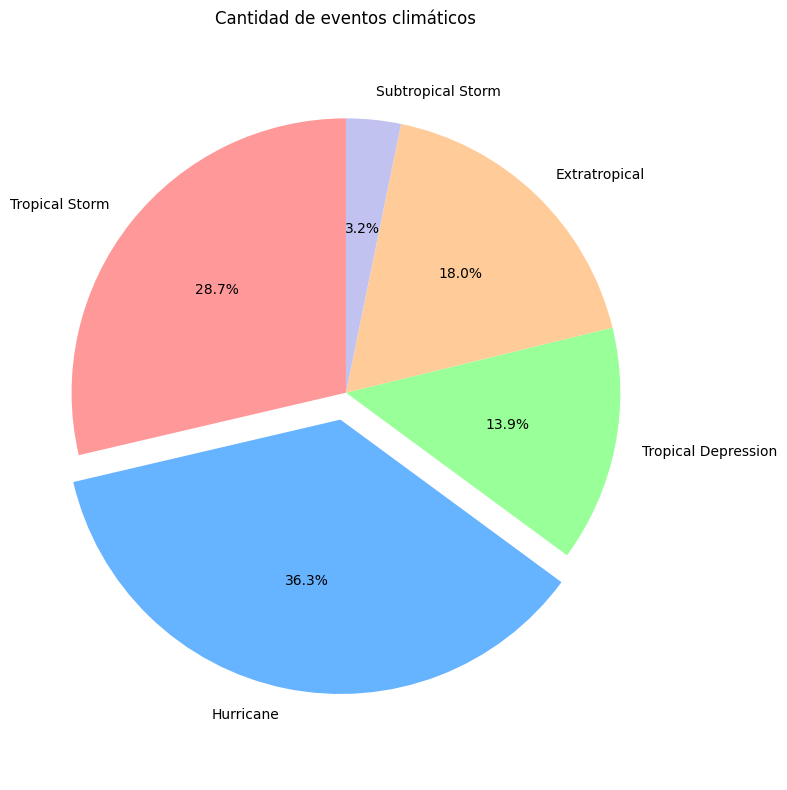

In [ ]:
categorias = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "julio", "Agosto", "Semptiembre", "Octubre", "Noviembre", "Diciembre"]
cantidad = [1086, 1374, 527, 681, 122]
#colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

plt.figure(figsize=(8, 8))
plt.pie (cantidad, labels=categorias, autopct='%1.1f%%', startangle=90)
plt.title("Cantidad de energía solar por mes")
plt.axis('equal')
plt.tight_layout()
plt.show()

Esta grafica de distribucions nos muestra la cantidad de las categorias que hay por todos los eventos climaticos donde notamos que mayormente los eventos climaticos son de categorias bajas

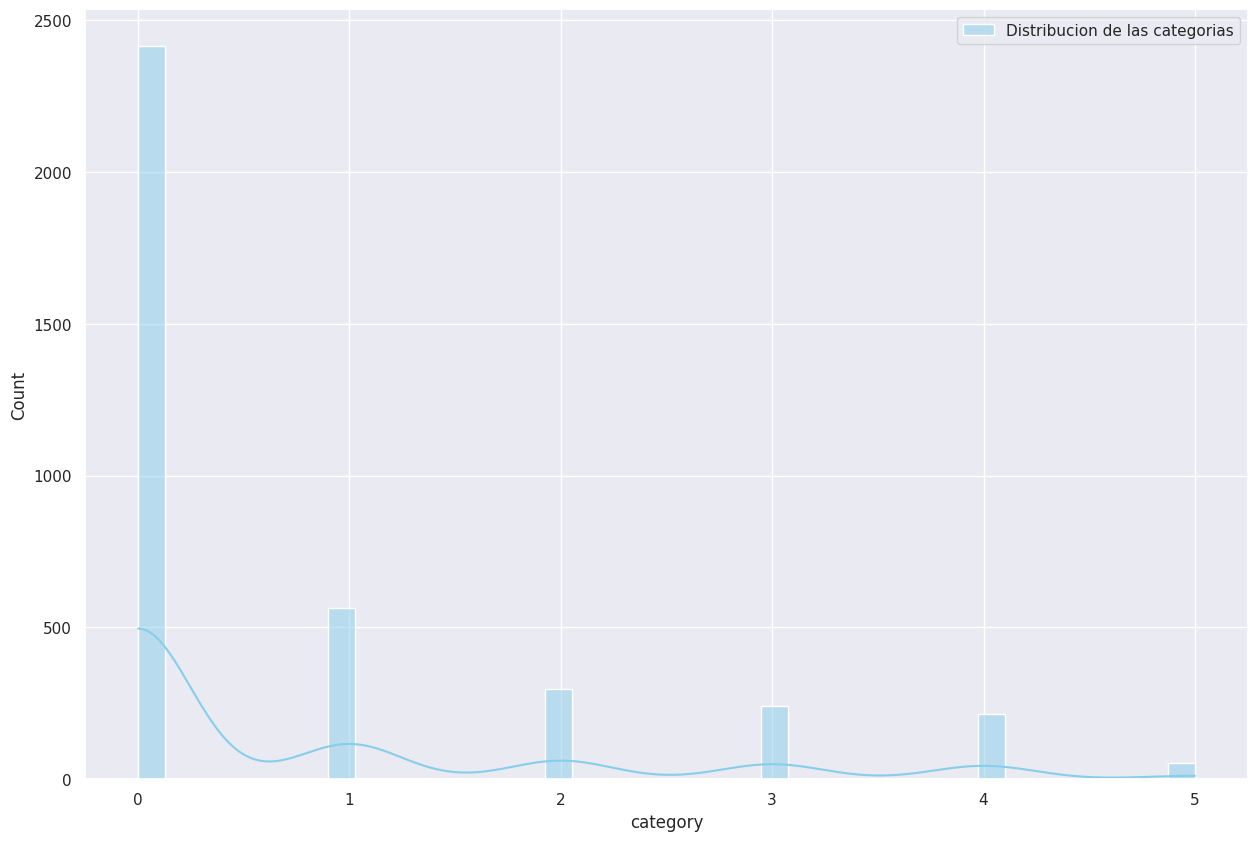

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data=huracanes3, x="category", color="skyblue", label="Distribucion de las categorias", kde=True)

plt.legend()
plt.show()

Esta otra grafica muestra la relación entre la categoría, velocidad del viento y presión en los ciclones tropicales. Se destaca que a mayor viento, menor presión, y que los huracanes tienen vientos más fuertes y presiones más bajas

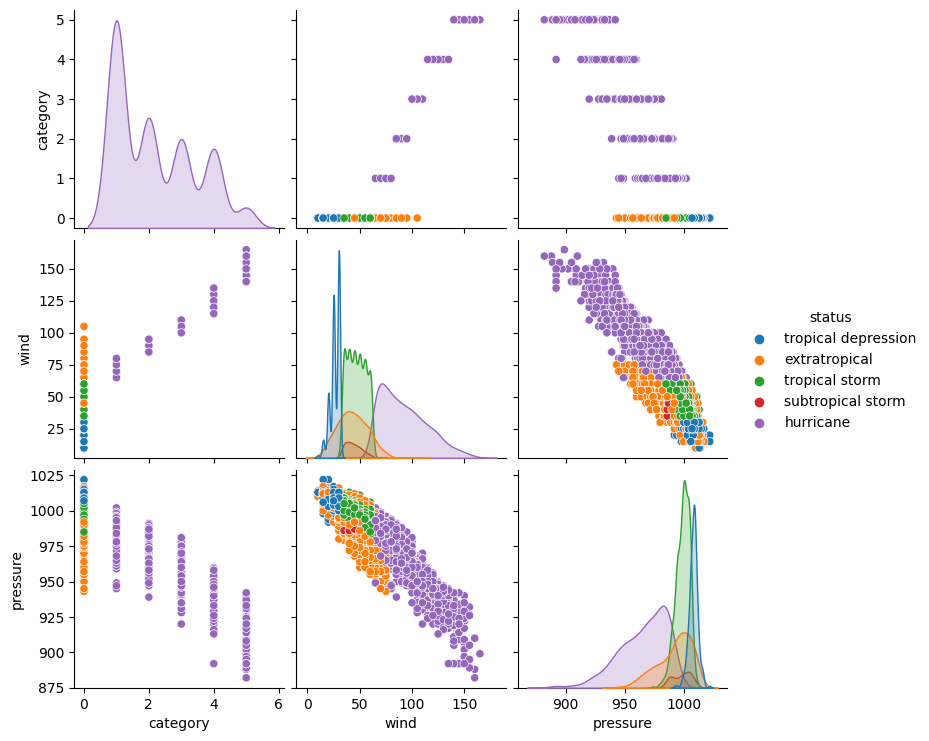

In [ ]:
sns.pairplot(huracanes3, hue='status')